In [1]:
import os

# Check current working directory
print(os.getcwd())

# Change to the root directory of your project, if necessary
os.chdir('C:/Users/yashv/Downloads/HADLN_implementation/HADLN_implementation/')
print(os.getcwd())


c:\Users\yashv\Downloads\HADLN_implementation\HADLN_implementation\notebooks
C:\Users\yashv\Downloads\HADLN_implementation\HADLN_implementation


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load data
csv_file_path = 'C:/Users/yashv/Downloads/HADLN_implementation/HADLN_implementation/data/raw/physionet2017.csv'
data = pd.read_csv(csv_file_path)

# Preprocessing
# Assuming the last two columns are labels and data is shaped as [number_of_samples, 2000, 1]
ecg_signals = data.iloc[:, :-2].values.reshape(-1, 2000, 1)  # Adjust the slicing based on your dataset
labels = data.iloc[:, -1].values  # Assuming the last column is the label

# Scale data
scaler = StandardScaler()
ecg_signals = scaler.fit_transform(ecg_signals.reshape(-1, 2000)).reshape(-1, 2000, 1)

# Split data into 50% training and 50% testing
X_train, X_test, y_train, y_test = train_test_split(ecg_signals, labels, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (4264, 2000, 1), Training labels shape: (4264,)
Testing data shape: (4264, 2000, 1), Testing labels shape: (4264,)


In [4]:
# Load the trained model
model_path = 'models/resnet_best.h5'  # Adjust path if necessary
model = tf.keras.models.load_model(model_path)


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2000, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2000, 32)     544         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 2000, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2000, 32)     0           ['batch_normalization[0][0]']

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


134/134 [==============================] - 9s 43ms/step - loss: 0.8124 - accuracy: 0.7460
Test Loss: 0.8123876452445984
Test Accuracy: 74.60%


134/134 [==============================] - 6s 40ms/step


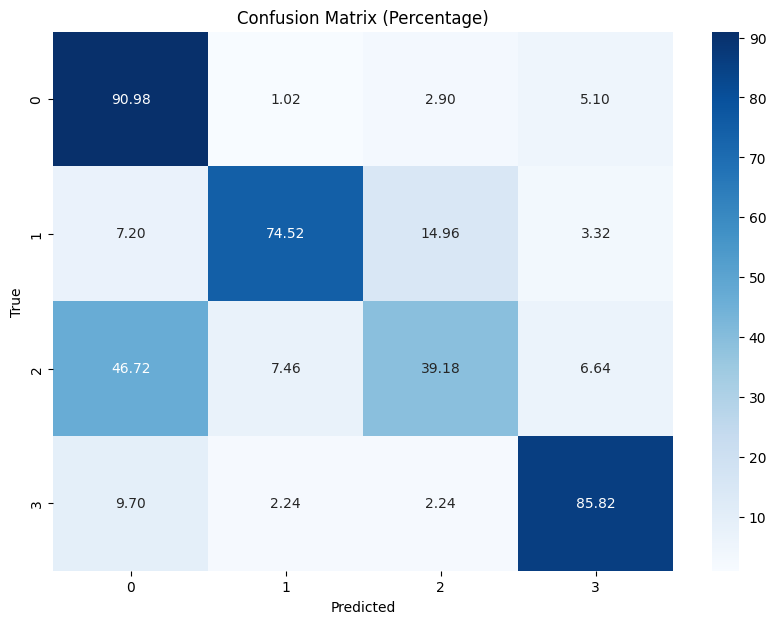

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2549
           1       0.69      0.75      0.72       361
           2       0.78      0.39      0.52      1220
           3       0.34      0.86      0.49       134

    accuracy                           0.75      4264
   macro avg       0.65      0.73      0.64      4264
weighted avg       0.77      0.75      0.73      4264



In [6]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))
